#### By: Madawi Saad Alkahtani


# Project: TMDb Movie Data Analysis



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

We will analysis data of TMDb Movie taken from <a href="https://www.kaggle.com/tmdb/tmdb-movie-metadata">Kaggle</a>  data set contains information about 10,000 movies collected from The Movie Database (TMDb), it contains two csv files. In my analysis I need only one of csv files it cover my needs. 
which is tmdb_5000_movies

#### The tmdb_5000_movies.csv
<ul>
    That contains these columns:
<li> movie budget </li>
<li> genres of movie: Contain multiple values such as id and name of genres separated by pipe</li>
<li> homepage: Contain link of homepage of each movie </li>
<li> id for each movie </li> 
<li> the number of popularity for each movie </li>
<li> production_companies of each movie </li>
<li> production_countries of each movie</li>
<li> release_date the release date of each movie </li>
<li> revenue of each movie </li>
<li> status of each movie: Contain three different types of statues: Released, Rumored and Post Production</li>
<li> vote_average for each movie </li>
<li> vote_count for each movie </li>  
</ul>

These columns we will use it to our analysis and we will remove others that unnecessary in our analysis. 

I will answering to three questions that related to my analysis that will achive goal.

<ol>
<li> What are top 10 movies they return the highest revenue comparing with budget?</li>
<li> What kind of properties are associated with movies that have higher revenue?</li>
<li> What is the year that has the more released movies from 1980 and above? </li>
<li> What is the most production countries for movies?</li>
<li> How long is the running time for most movies? </li>
<li> What is the top genre of movies?</li>

    
</ol>




In [1]:
# import all packages I plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import ast, json


## Data Wrangling


In this process I will inspect and figure out more about the dataset as well as what the changes I will make it to achieve my goal and answering all questions. 
### General Properties

In [2]:
# Load data and print out a few lines. Perform operations to inspect data

df_m = pd.read_csv('tmdb_5000_movies.csv' )
# Explore data
df_m.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# know how many columns and rows
df_m.shape   # 4803 rows and 20 columns 

(4803, 20)

In [4]:
df_m.describe()  # know more about dataset in statistics view

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
df_m.info() # show some information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Drop columns 
I will drop all columns that don't need to analysis a dataset. 

In [6]:
# drop columns

df_m.drop(['homepage', 'keywords', 'overview' , 'tagline', 
                        'title', 'spoken_languages'], axis=1, inplace=True )


In [7]:
df_m.head() # show dataset after dropped columns

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,6.1,2124


In [8]:
df_m.shape  # 4803 rows and 14 columns 

(4803, 14)

In [9]:
# rename columns

df_m.rename(columns={'original_title': 'title' , 'original_language': 'language'}, inplace = True)

In [10]:
df_m.head()

,budget,genres,id,language,title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,6.1,2124


In [11]:
df_m.isnull().values.any() # check if there is any missing values

True

In [12]:

df_m.isnull().sum() # know in exactly which column contains null values and how many 


budget                  0
genres                  0
id                      0
language                0
title                   0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
status                  0
vote_average            0
vote_count              0
dtype: int64

In [13]:
df_m.dropna(inplace = True) # drop all missing values

In [14]:
df_m.isnull().values.any() # check again

False

In [15]:
df_m.duplicated().values.any() #check if there is any duplicated values

False

As we can see below in this statistic view there is an error or missing in budget columns beacuse the min function shows 0 is a minimum value which is inapplicable so we will handle this by dropping rows contatin 0 of budget


In [16]:
df_m.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,56949.011667,21.505569,8.231205e+07,106.898125,6.094458,690.646875
std,4.073029e+07,88292.839372,31.822163,1.628950e+08,22.561593,1.188366,1234.852449
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.750000,4.682212,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.500000,12.928897,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58512.500000,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [17]:
df_m['budget'].min()

0

In [18]:
df_m.loc[df_m['budget'] == 0] # there are 1036 rows contain 0 of budget

,budget,genres,id,language,title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,en,The Cat in the Hat,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,Released,4.9,366
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",77953,en,The Campaign,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-08-09,104907746,85.0,Released,5.6,578
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",258509,en,Alvin and the Chipmunks: The Road Chip,27.867368,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-12-17,233755553,92.0,Released,5.8,428
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",51052,en,Arthur Christmas,19.836830,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-02-22,0,97.0,Released,6.7,333
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",16858,en,All That Jazz,5.159407,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1979-12-20,37823676,123.0,Released,7.3,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",124606,en,Bang,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,Released,6.0,1
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",67238,en,Cavite,0.022173,[],[],2005-03-12,0,80.0,Released,7.5,2
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,Released,7.0,6
4801,0,[],126186,en,Shanghai Calling,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,Released,5.7,7


In [19]:
df_m = df_m.replace(0, np.nan)           # Replace the zeros with nan and then drop the rows with all entries as nan.
df_m = df_m.dropna(how='all', axis=0)

In [20]:
df_m.isnull().values.any() # check again

True

In [21]:
df_m.isnull().sum() # Replace 0 values with nan so there is a missing values again

budget                  1036
genres                     0
id                         0
language                   0
title                      0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1424
runtime                   34
status                     0
vote_average              61
vote_count                60
dtype: int64

In [22]:
df_m.dropna(inplace = True) # drop all missing values

In [23]:
df_m.isnull().values.any() # check again

False

In [24]:
df_m.shape  # 3227 rows and 14 columns 

(3227, 14)

In [25]:
df_m.describe() # as shown we fixed the budget with 0

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.227000e+03,3227.000000,3227.000000,3.227000e+03,3227.000000,3227.000000,3227.000000
mean,4.067877e+07,44601.870778,29.051491,1.213181e+08,110.720793,6.313263,977.893090
std,4.439974e+07,74281.771931,36.169863,1.863361e+08,20.970364,0.859921,1414.538507
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,2.300000,1.000000
25%,1.050000e+07,4954.500000,10.475904,1.704008e+07,96.000000,5.800000,178.000000
50%,2.500000e+07,11442.000000,20.415572,5.519828e+07,107.000000,6.300000,471.000000
75%,5.500000e+07,45256.000000,37.345773,1.463949e+08,121.000000,6.900000,1148.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


### Cleaning the Json in Dataset.
This step is not necessary but will make worke much easier . So, there is many columns in the dataset are in json format such as: genres, production_companies and production_countries. we will learn how to handle and clean it.

In [26]:

def parse_col_json(column, key):  # To fix value that with json
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(df_m.index,df_m[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
            df_m.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('production_companies', 'name')



df_m.head()

,budget,genres,id,language,title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,en,Avatar,150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,Released,7.2,11800.0
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,en,Pirates of the Caribbean: At World's End,139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,9.610000e+08,169.0,Released,6.9,4500.0
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,en,Spectre,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,Released,6.3,4466.0
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",49026,en,The Dark Knight Rises,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1.084939e+09,165.0,Released,7.6,9106.0
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",49529,en,John Carter,43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,2.841391e+08,132.0,Released,6.1,2124.0


## Exploratory Data Analysis



 Now we know that our dataset is cleaned and we ready to start exploration.
 Compute statistics and create visualizations with the goal of addressing the research questions that I posed
 earlier in the Introduction section. 

### 1) What are top 10 movies they return the highest revenue comparing with budget?

The goal of the question is to find out whether the higher budget of the movie gets more revenue or not?
The answer is from the bar chart as shown below it is not. As we can see the Avatar movie spent less on the budget than Avengers: Age of Ultron and Captain America: Civil War movies and it returned as much revenue than others.

The top 10 movies earned the highest revenue are:

<ol>
<li> Avatar </li>
<li> Titanic </li>
<li> The Avengers</li>
<li> Jurassic World </li>
<li> Furious 7 </li>
<li> Avengers: Age of Ultron</li>
<li> Frozen </li>
<li> Iron Man 3 </li>
<li> Minions</li>
<li> Captain America: Civil War</li>        
</ol>

In [27]:
df_m.sort_values('revenue', ascending = False).head(10) # sort the top 10 data in descending by revenue 


,budget,genres,id,language,title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,en,Avatar,150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,Released,7.2,11800.0
25,200000000.0,"['Drama', 'Romance', 'Thriller']",597,en,Titanic,100.025899,"['Paramount Pictures', 'Twentieth Century Fox ...",['United States of America'],1997-11-18,1.845034e+09,194.0,Released,7.5,7562.0
16,220000000.0,"['Science Fiction', 'Action', 'Adventure']",24428,en,The Avengers,144.448633,"['Paramount Pictures', 'Marvel Studios']",['United States of America'],2012-04-25,1.519558e+09,143.0,Released,7.4,11776.0
28,150000000.0,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,en,Jurassic World,418.708552,"['Universal Studios', 'Amblin Entertainment', ...",['United States of America'],2015-06-09,1.513529e+09,124.0,Released,6.5,8662.0
44,190000000.0,['Action'],168259,en,Furious 7,102.322217,"['Universal Pictures', 'Original Film', 'Fuji ...","['Japan', 'United States of America']",2015-04-01,1.506249e+09,137.0,Released,7.3,4176.0
7,280000000.0,"['Action', 'Adventure', 'Science Fiction']",99861,en,Avengers: Age of Ultron,134.279229,"['Marvel Studios', 'Prime Focus', 'Revolution ...",['United States of America'],2015-04-22,1.405404e+09,141.0,Released,7.3,6767.0
124,150000000.0,"['Animation', 'Adventure', 'Family']",109445,en,Frozen,165.125366,"['Walt Disney Pictures', 'Walt Disney Animatio...",['United States of America'],2013-11-27,1.274219e+09,102.0,Released,7.3,5295.0
31,200000000.0,"['Action', 'Adventure', 'Science Fiction']",68721,en,Iron Man 3,77.682080,['Marvel Studios'],"['China', 'United States of America']",2013-04-18,1.215440e+09,130.0,Released,6.8,8806.0
546,74000000.0,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,en,Minions,875.581305,"['Universal Pictures', 'Illumination Entertain...",['United States of America'],2015-06-17,1.156731e+09,91.0,Released,6.4,4571.0
26,250000000.0,"['Adventure', 'Action', 'Science Fiction']",271110,en,Captain America: Civil War,198.372395,"['Studio Babelsberg', 'Marvel Studios', 'Walt ...",['United States of America'],2016-04-27,1.153304e+09,147.0,Released,7.1,7241.0


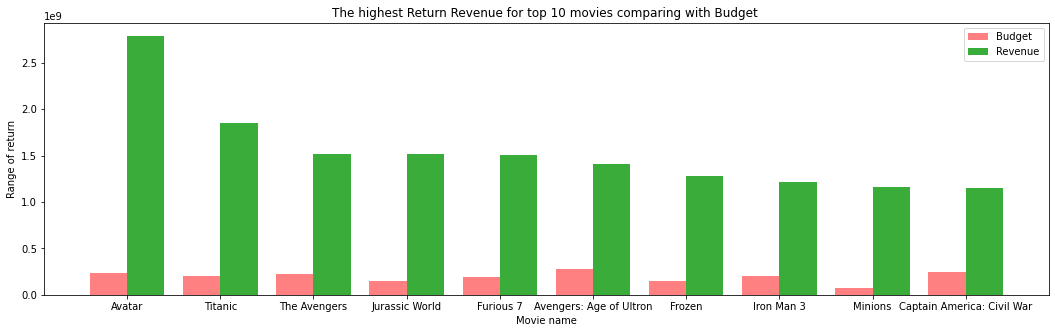

In [28]:
# Show barchart comparing budget with revenue

df_top10 = df_m.sort_values('revenue', ascending = False).head(10) # create dataframe with only top 10 of movies with higher reveneue

df=pd.DataFrame(df_top10[["budget","revenue", "title"]],columns=["budget","revenue", "title"]) 
    
    
X = df_top10["title"]
Y =  df_top10["budget"]
Z = df_top10["revenue"]
  
X_axis = np.arange(len(X))
fig = plt.subplots(figsize=(18,5))  


plt.bar(X_axis - 0.2, Y, 0.4, color = '#ff8080')
plt.bar(X_axis + 0.2, Z, 0.4, color = '#39ac39')


    
plt.xticks(X_axis,X)
plt.xlabel("Movie name")
plt.ylabel("Range of return")
plt.title("The highest Return Revenue for top 10 movies comparing with Budget ")
plt.legend(['Budget', 'Revenue'])
plt.show()

### 2) What kind of properties are associated with movies that have higher revenue ? 

We can discoverd that from analysis below the average runtime of top 10 returned the higher revenues is 137 and voting average of all is above 6 

In [29]:
df_top10.head(10) # this dataframe contains the top 10 movies returned the higher revenues

,budget,genres,id,language,title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,en,Avatar,150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,Released,7.2,11800.0
25,200000000.0,"['Drama', 'Romance', 'Thriller']",597,en,Titanic,100.025899,"['Paramount Pictures', 'Twentieth Century Fox ...",['United States of America'],1997-11-18,1.845034e+09,194.0,Released,7.5,7562.0
16,220000000.0,"['Science Fiction', 'Action', 'Adventure']",24428,en,The Avengers,144.448633,"['Paramount Pictures', 'Marvel Studios']",['United States of America'],2012-04-25,1.519558e+09,143.0,Released,7.4,11776.0
28,150000000.0,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,en,Jurassic World,418.708552,"['Universal Studios', 'Amblin Entertainment', ...",['United States of America'],2015-06-09,1.513529e+09,124.0,Released,6.5,8662.0
44,190000000.0,['Action'],168259,en,Furious 7,102.322217,"['Universal Pictures', 'Original Film', 'Fuji ...","['Japan', 'United States of America']",2015-04-01,1.506249e+09,137.0,Released,7.3,4176.0
7,280000000.0,"['Action', 'Adventure', 'Science Fiction']",99861,en,Avengers: Age of Ultron,134.279229,"['Marvel Studios', 'Prime Focus', 'Revolution ...",['United States of America'],2015-04-22,1.405404e+09,141.0,Released,7.3,6767.0
124,150000000.0,"['Animation', 'Adventure', 'Family']",109445,en,Frozen,165.125366,"['Walt Disney Pictures', 'Walt Disney Animatio...",['United States of America'],2013-11-27,1.274219e+09,102.0,Released,7.3,5295.0
31,200000000.0,"['Action', 'Adventure', 'Science Fiction']",68721,en,Iron Man 3,77.682080,['Marvel Studios'],"['China', 'United States of America']",2013-04-18,1.215440e+09,130.0,Released,6.8,8806.0
546,74000000.0,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,en,Minions,875.581305,"['Universal Pictures', 'Illumination Entertain...",['United States of America'],2015-06-17,1.156731e+09,91.0,Released,6.4,4571.0
26,250000000.0,"['Adventure', 'Action', 'Science Fiction']",271110,en,Captain America: Civil War,198.372395,"['Studio Babelsberg', 'Marvel Studios', 'Walt ...",['United States of America'],2016-04-27,1.153304e+09,147.0,Released,7.1,7241.0



### 3) What is the year that has the more released movies from 1980 and above ? 

As we discoverd from the graph below the year had more release movies it a 2011 with approximately 170 movies released. 

In [30]:
def get_year(year):      # split year from released_date 
    return year.split("-")[0].strip(" ")


df_m['Year'] = df_m['release_date'].apply(lambda x: get_year(x)) # add new Year column
df_m.head()

,budget,genres,id,language,title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,Year
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,en,Avatar,150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,Released,7.2,11800.0,2009
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,en,Pirates of the Caribbean: At World's End,139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,9.610000e+08,169.0,Released,6.9,4500.0,2007
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,en,Spectre,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,Released,6.3,4466.0,2015
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",49026,en,The Dark Knight Rises,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1.084939e+09,165.0,Released,7.6,9106.0,2012
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",49529,en,John Carter,43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,2.841391e+08,132.0,Released,6.1,2124.0,2012


In [31]:
df_m['Year'].value_counts()

2011    168
2006    163
2010    162
2009    154
2013    152
       ... 
1916      1
1955      1
1958      1
1934      1
1925      1
Name: Year, Length: 89, dtype: int64

In [32]:
df_y = df_m.loc[df_m['Year'] >= '1980'] # Create new dataframe filterd from 1980 and above

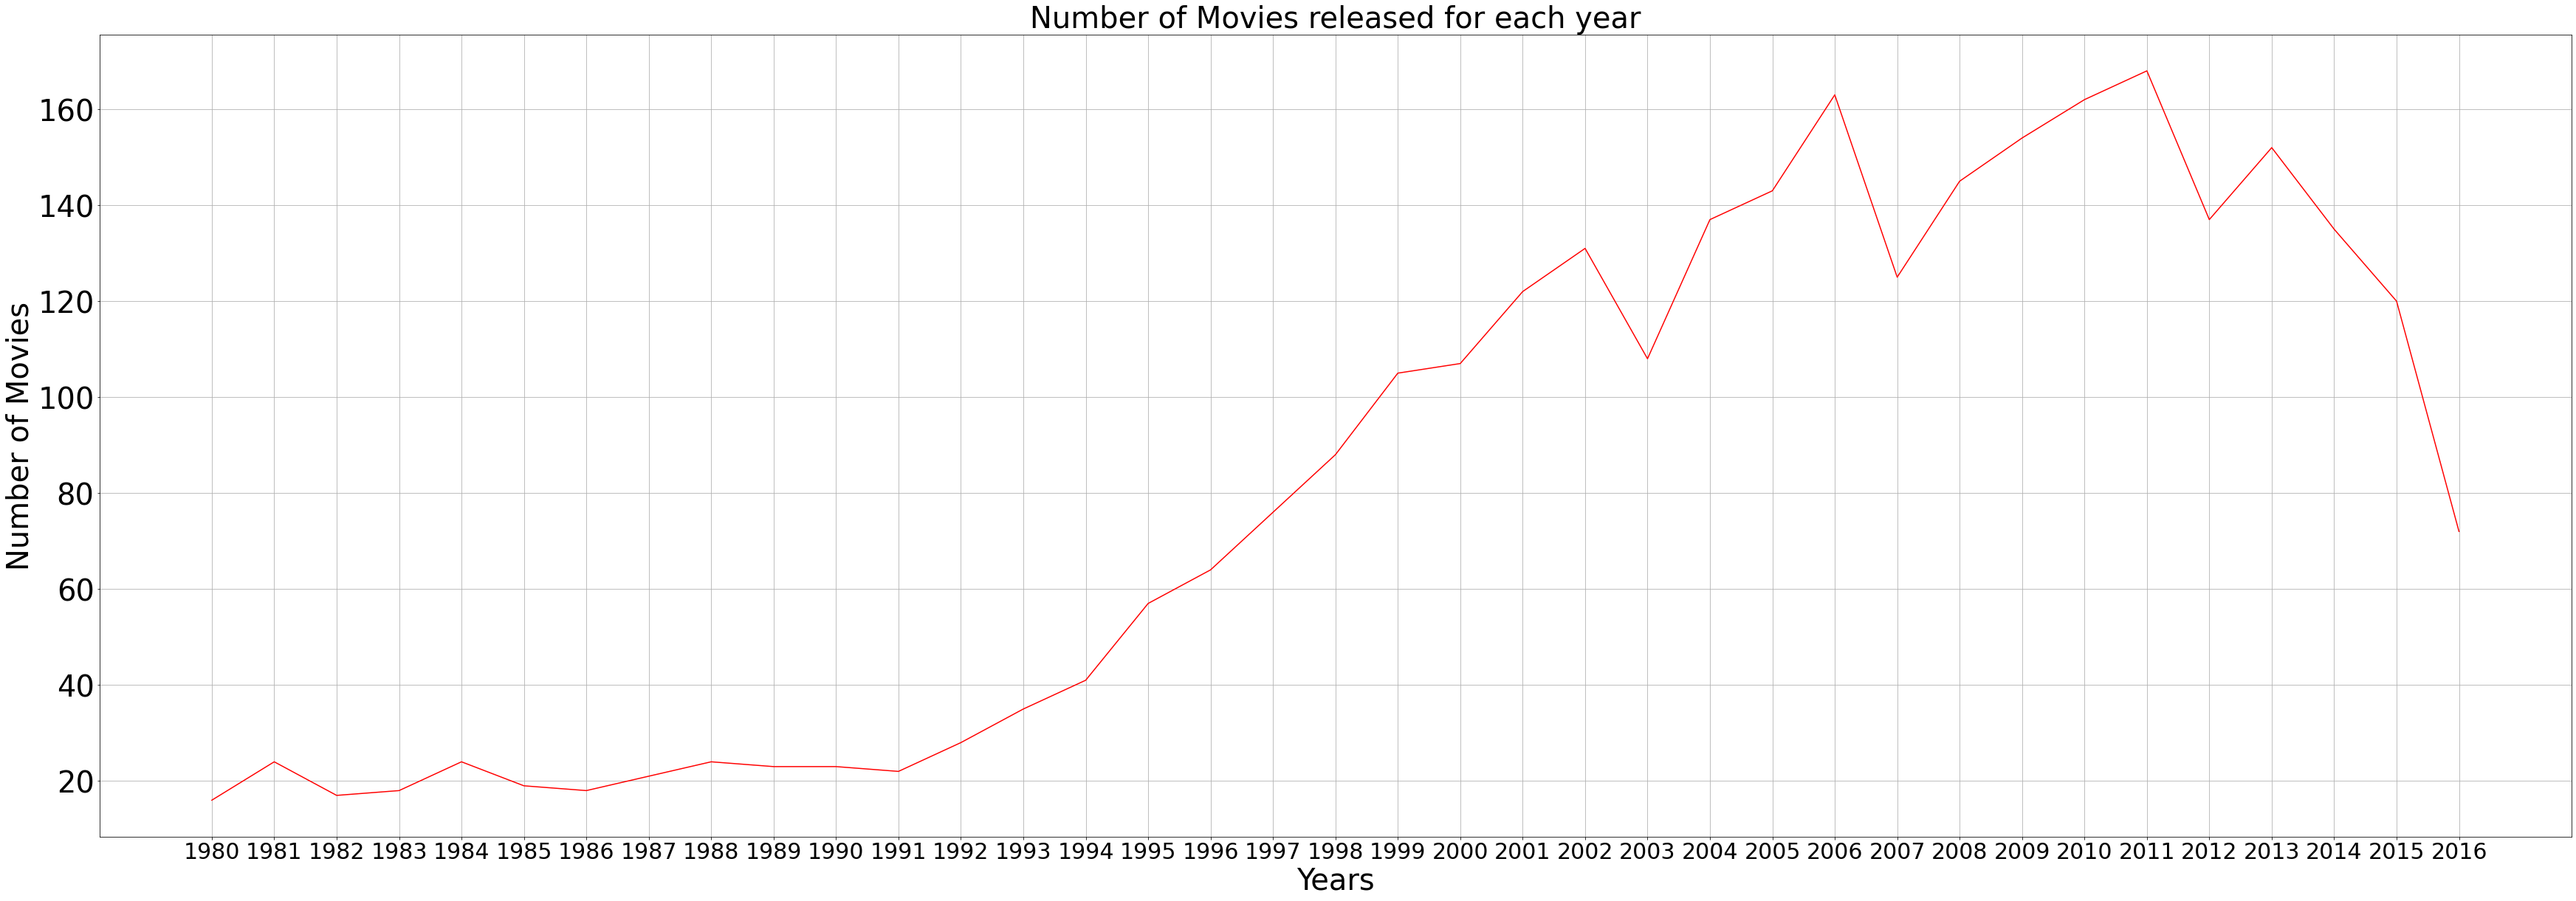

In [44]:
keys = [pair for pair, df in df_y.groupby(['Year'])] 
fig = plt.subplots(figsize=(60,20))  

plt.plot(keys, df_y.groupby(['Year']).count()['title'], color ='red' ) # Group by year with count of movies

# x and y values and font size
plt.xticks(keys, fontsize=30) 
plt.yticks(fontsize=40)
plt.xlabel("Years", fontsize=40)
plt.ylabel("Number of Movies", fontsize=40)
plt.title('Number of Movies released for each year', fontsize=40)


plt.grid()
plt.show()


### 4) What is the most production countries for movies?

As we expected The United States of America is the most production country for movie with more than 2500 number of movies then United Kigdom with 436 movies. 

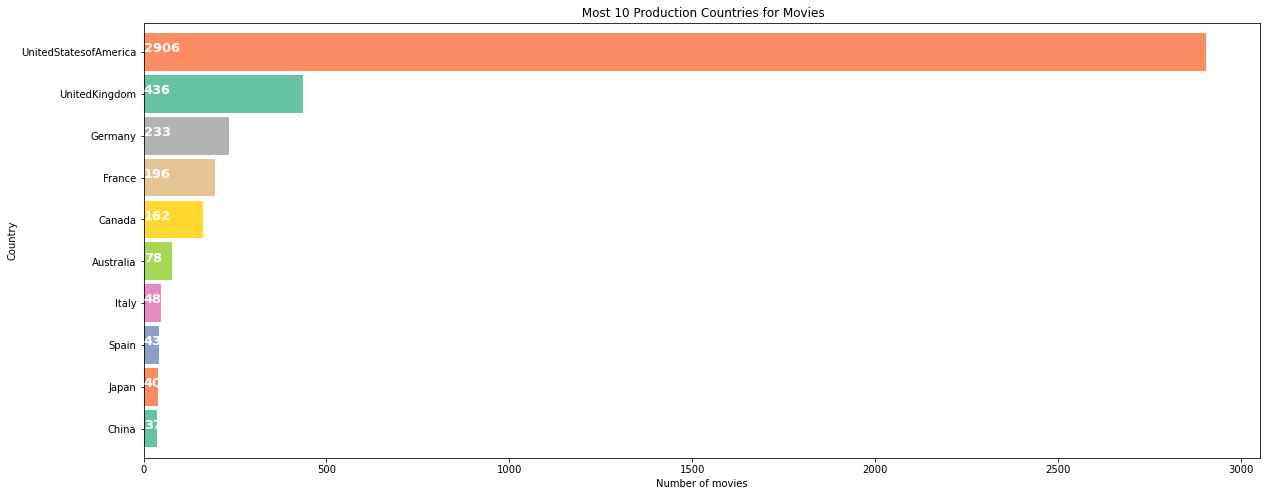

In [34]:
df_m['production_countries']= df_m['production_countries'].str.strip('[ ]').str.replace(' ',"").str.replace("'",'')
df_m['production_countries']=df_m['production_countries'].str.split(',')

plt.subplots(figsize=(20,8))
list1=[]
for i in df_m['production_countries']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette("Set2", 10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=13,color='white',weight='bold')
plt.xlabel("Number of movies")
plt.ylabel("Country")
plt.title(' Most 10 Production Countries for Movies')
plt.show()


### 5) How long is the running time for most movies?

Around 500 number of movies they running time is 100 minutes

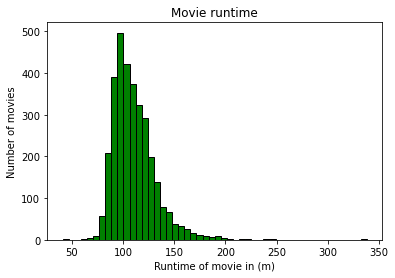

In [35]:
# Plot histogram of Movie Runtime
plt.hist(df_m['runtime'],bins=50,histtype='bar',ec='black', color='g')

# Label the axis, title
plt.xlabel('Runtime of movie in (m)')
plt.ylabel('Number of movies')
plt.title('Movie runtime')

# Show the histogram
plt.show()


### 6) What is the top genre of movies ?

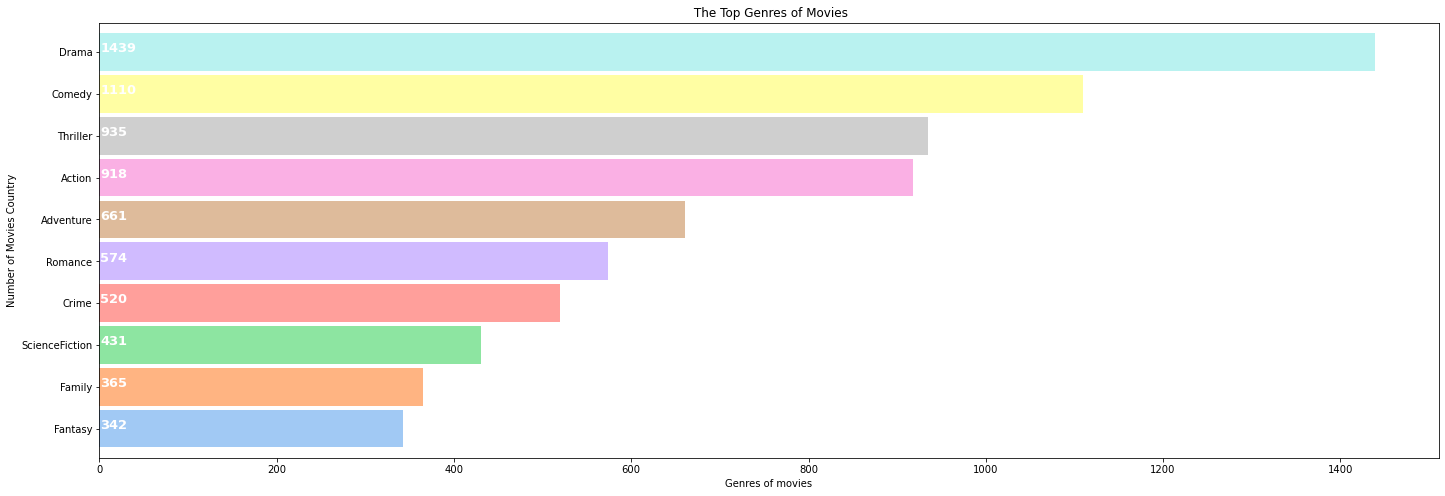

In [36]:
df_m['genres']= df_m['genres'].str.strip('[ ]').str.replace(' ',"").str.replace("'",'')
df_m['genres']=df_m['genres'].str.split(',')

plt.subplots(figsize=(24,8))
list1=[]
for i in df_m['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette("pastel", 10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=13,color='white',weight='bold')
# Label the axis, title
plt.xlabel("Genres of movies")
plt.ylabel("Number of Movies Country")
plt.title(' The Top Genres of Movies')

#show graph
plt.show()

## Conclusions



In conclusion, this analysis has discovered too many areas about movies it is cleared that the most production genres of movies are Drama then Comedy. Furthermore, the movies with a high budget do not guarantee the return of more returns or profits, which often guarantees this in the first place is a vote on the movie approximately above 6 on average.  Movie rating or vorting plays a role in obtaining higher returns of revenues and on average companies spend more than 40$ million on movie production. 
As well as, we know a year rich in movie release that is 2011 with more than 160 movies, and as all of us expected that, the United States has more production of movies then come in the second place a United of Kingdom. Also, most movies have a running time of 100 minutes.  Finally, there is a limitation in this analysis which is in the dataset itself, and in my perspective, it affects the quality of data as we mentioned earlier movie rating or voting plays a role in obtaining higher returns of revenues but the problem is voting depends on the voting count. For instance, when 2 people voted with an average of 8.5/10 for a movie and another 20 people voted for other movie with an average of 7.5/10 we know that for sure the second movie is better than the first, although the rating or voting for the first is higher. So, this limit it's must be in our consideration.        




## References 

<ul>
<li> <a>https://www.youtube.com/watch?v=eMOA1pPVUc4 </a> </li>
<li> <a>https://medium.com/analytics-vidhya/netflix-movies-and-tvshows-exploratory-data-analysis-eda-and-visualization-using-python-80753fcfcf7</a> </li>
<li> <a> https://github.com/harshitcodes/tmdb_movie_data_analysis/blob/master/tmdb_data_analysis.ipynb </a></li>
    </ul>